In [5]:
import gym
from tqdm.notebook import tqdm
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import agents as ag
from importlib import reload
from utils import ReplayBuffer, plot
import wandb

In [8]:
UPDATE_ONLINE = True
BATCH_SIZE = 64
MAX_EPISODES = 1000
RANDOM_EXPERIENCE = 0
LEARNING_RATE = 3e-4
BUFFER_SIZE = 10000
ENVIRONMENT = 'CartPole-v1'
wandbsave = False

config = {
    "learning_rate": LEARNING_RATE,
    "max_episodes": MAX_EPISODES,
    "batch_size": BATCH_SIZE, 
    "online_updating": UPDATE_ONLINE,
    "random_experience": RANDOM_EXPERIENCE,
    "buffer_size": BUFFER_SIZE
}
if wandbsave:
    wandb.init(project="agent_testing", entity="climate_policy_optim", name="a2c cartpole 3", config=config)


env = gym.make(ENVIRONMENT)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

reload(ag)
memory = ReplayBuffer(BUFFER_SIZE)
agent = ag.A2C(state_dim, action_dim)

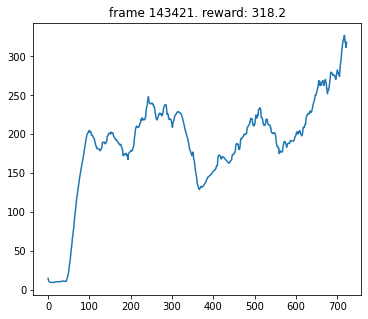

KeyboardInterrupt: 

In [9]:
rewards = []
mean_rewards = []
frame_idx = 0
np.random.seed(1)

for episodes in tqdm(range(MAX_EPISODES)):
    state = env.reset()
    episode_reward = 0
    done = False
    I = 1 
    while not done:
        if episodes>RANDOM_EXPERIENCE:
            action = agent.get_action(state)
        else:
            action = np.random.choice(action_dim)
            
        next_state, reward, done, _ = env.step(action)
        
        episode_reward += reward
        
        if UPDATE_ONLINE:
            loss = agent.online_update((state, action, reward, next_state, done), I)
            I *= agent.gamma
            if wandbsave:
                wandb.log({'loss': loss})
        else:
            memory.push(state, action, reward, next_state, done)
            if memory.__len__() > BATCH_SIZE:
                sample = memory.sample(BATCH_SIZE)
                loss = agent.update(sample)
                if wandbsave:
                    wandb.log({'loss': loss})
                
        state = next_state
        frame_idx += 1 

    rewards.append(episode_reward)
    mean_rewards.append(np.mean(rewards[-50:]))
   
    agent.update_nets()
    if wandbsave:
        wandb.log({'episode_reward':episode_reward})
        wandb.watch(agent.ac_net)
    
    if mean_rewards==500:
        break
    if frame_idx % 100:
        plot(frame_idx, mean_rewards)
if wandbsave:
    wandb.finish()

In [ ]:
for episodes in range(100):
    done = False
    state = env.reset()
    while not done:
        env.render()
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        state = next_state

In [4]:
from .. import Learn
from importlib import reload
import gym

reload(lc)

ImportError: attempted relative import with no known parent package